# Vorhersagbarkeit Herzkrankheit

In diesem Kursprojekt werden verschiedene Modelle aus klassischer Statistik und Machine Learning verwendet, um die Wahrscheinlichkeit einer Herzerkrankung (eines Herzinfarktes) vorherzusagen. Als Prädiktoren wurden verschiedene demographische Variablen und Parameter des Gesundheitszustandes verwendet. Zunächst wurde der Datensatz eingelesen und vorverarbeitet. Darauf folgte die Erstellung verschiedener Vorhersagemodelle: 1. Logistische Regression, 2. Support Vector Machines, 3. Decision Tree, 4. Random Forest. Abschließend wurde die Modellgüte der verschiedenen Ansätze verglichen. Eine Übersicht über die verwendeten Schritte findet sich unten.
Der verwendete Datensatz stammt aus dem UCI Machine Learning Repository und wurde von David W. Aha aufbereitet und zur Verfügung gestellt. Er befindet auch an verschiedenen Stellen auf Kaggle, worüber er für dieses Projekt bezogen wurde ([Kaggle Datensatz](https://https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)). Der [ursprüngliche Datensatz ](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)enthielt 75 Variablen (erstellt 1988). Darauf basierend wurde ein Datensatz mit 14 Variablen extrahiert, der bereits Grundlage verschiedener Veröffentlichungen und Machine Learning Ansätze war und auch für dieses Projekt verwendet wurde.

### Vorgehen/Inhalt:
* [Vorbereitungen](#Kap0)
* [Explorative Datenanalyse](#Kap2)
* [Logistische Regression](#Kap3)
* [Support Vector Machines](#Kap4)
* [Modellgüte bestimmen](#Kap5)

## Vorbereitungen <a class="anchor" id="Kap0"></a>

In [ ]:
import os
import pandas as pd

HEART_PATH = "D:/AI for Medicine Kurs/Projekt/"   #Pfad, in dem die Datei liegt
def load_heart_data(heart_path = HEART_PATH):
        csv_path = os.path.join(heart_path,"heart.csv")
        return pd.read_csv(csv_path)

In [ ]:
#Import benötigter Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

Als erstes importieren wir unser github Repo. Der nächste Schritt ist der import des Datasets.


In [ ]:
!wget https://raw.githubusercontent.com/DeamonAmelie/heart/main/heart.csv


--2021-06-18 10:53:26--  https://raw.githubusercontent.com/DeamonAmelie/heart/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11323 (11K) [text/plain]
Saving to: ‘heart.csv.1’

heart.csv.1         100%[===================>]  11.06K  --.-KB/s    in 0s      

2021-06-18 10:53:26 (22.7 MB/s) - ‘heart.csv.1’ saved [11323/11323]



In [ ]:
df = load_heart_data()

FileNotFoundError: ignored

In [ ]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

### Beschreibung der Daten <a class="anchor" id="Kap1"></a>

Insgesamt liegen 14 Variablen und 303 Fälle im Datensatz vor. Die Variablen sind die folgenden:



    age - age in years; continuous

    sex - sex; binary (1 = male; 0 = female)

    cp - chest pain type; categorical (0 = asymptomatic, 1 = atypical angina, 2 = non-anginal pain, 3 = typical angina)

    trtbps - resting blood pressure in mm Hg on admission to the hospital; continuous

    chol - serum cholestoral in mg/dl; continuous

    fbs - fasting blood sugar > 120 mg/dl; binary (0 = false, 1 = true)

    restecg - resting electrocardiographic results; categorical (0 = normal; 1 = having ST-T; 2 = hypertrophy)

    thalachh - maximum heart rate achieved; continuous

    exng - exercise induced angina; binary (0 = no, 1 = yes)

    oldpeak - ST depression induced by exercise relative to rest; continuous

    slp - the slope of the peak exercise ST segment; categorical (0 = upsloping, 1 = flat, 2 = downsloping)

    caa - number of major vessels (0-3) colored by flourosopy; categorical (4 = missing value)

    thall- thallium stress; categorical (1 = fixed defect, 2 = normal, 3 = reversable defect, 0 = Missing value)

    output (Heart disease) - 0 = Heart disease, 1 = No heart disease
    
    Durch Dummy-Kodierung kommen noch die folgenden Variablen hinzu:
    cp_1 = 1 = atypical angina
    cp_2 = 1 = non-anginal pain
    cp_3 = 1= typical angina
    Refernz cp = normal
          
    restecg_1 = 1 = having ST-T
    restecg_2 = 1 = hypertrophy
    Referenz restecg = normal
    
    slp_1 = 1 = flat
    slp_2 = 1 = downsloping
    Referenz slp = upsloping
    
    thall_2 = 1 = normal
    thall_3 = 1 = reversable defect
    Referenz thall = fixed defect   
    


### Doppelten Fall entfernen
Beim Durchsehen des Datensatzes ist aufgefallen, dass ein Fall doppelt vor kam. Dieser wird entfernt:

In [ ]:
df.drop_duplicates(inplace = True)

### Missing values umkodieren
In dem Kaggle Datensatz wurden bei zwei Variablen (caa, thall) fehlende Werte durch Zahlen ersetzt. Dies muss rückgängig gemacht werden, um falsche Schätzungen zu vermeiden:

In [ ]:
df["caa"].replace(4,np.nan, inplace=True)
df["thall"].replace(0, np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       298 non-null    float64
 12  thall     300 non-null    float64
 13  output    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.4 KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.674497,2.330000,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.938202,0.585014,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


### Training- und Testset erstellen

Wir teilen das Datenset in ein Training- und Testset auf, um die Modelle aufstellen und testen zu können. Das Verhältnis von Training- und Testset beträgt 80/20.

In [ ]:
from sklearn.model_selection import train_test_split
heart_train, heart_test = train_test_split(df, test_size = 0.2, random_state = 15)

### Imputieren
Nachdem Trainings- und Testsets gebildet wurden, können die fehlenden Werte imputiert werden. Imputiert wird mittels Median, da die zu imputierenden Variablen dummy und ganzzahlige Variablen sind.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(heart_train)
#Fehlende Werte bei Trainingsdaten imputieren
heart_train_imp = imputer.transform(heart_train)
heart_train = pd.DataFrame(heart_train_imp, columns = heart_train.columns)
#Fehlende Werte bei Testdaten imputieren
heart_test_imp = imputer.transform(heart_test)
heart_test = pd.DataFrame(heart_test_imp, columns = heart_test.columns)

In [ ]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       241 non-null    float64
 1   sex       241 non-null    float64
 2   cp        241 non-null    float64
 3   trtbps    241 non-null    float64
 4   chol      241 non-null    float64
 5   fbs       241 non-null    float64
 6   restecg   241 non-null    float64
 7   thalachh  241 non-null    float64
 8   exng      241 non-null    float64
 9   oldpeak   241 non-null    float64
 10  slp       241 non-null    float64
 11  caa       241 non-null    float64
 12  thall     241 non-null    float64
 13  output    241 non-null    float64
dtypes: float64(14)
memory usage: 26.5 KB


### Dummy Variablen erstellen

Für die (kategorialen) Faktor-Variablen (cp, slp, restecg, thall) werden Dummy Variablen erstellt. Dabei werden nicht k-1 Variablen erstellt, d.h. das erste Faktor Level wird nicht gedropt.

In [ ]:
#Dummies für die Trainingsdaten
cp_dum = pd.get_dummies(heart_train.cp, prefix='cp', dtype=np.float64)
slp_dum = pd.get_dummies(heart_train.slp, prefix='slp', dtype=np.float64)
restecg_dum = pd.get_dummies(heart_train.restecg, prefix='restecg', dtype=np.float64)
thall_dum = pd.get_dummies(heart_train.thall, prefix = 'thall', dtype=np.float64)

In [ ]:
#Data Frames zusammenführen
frames = [cp_dum,slp_dum,restecg_dum, thall_dum]
heart_train = heart_train.join(frames)

In [ ]:
heart_train = heart_train.drop(columns = ["cp","slp","restecg","thall"]) #Entfernt die Ursprungsvariablen

In [ ]:
#Dummies für die Testdaten
cp_dum2 = pd.get_dummies(heart_test.cp, prefix='cp', dtype=np.float64)
slp_dum2 = pd.get_dummies(heart_test.slp, prefix='slp', dtype=np.float64)
restecg_dum2 = pd.get_dummies(heart_test.restecg, prefix='restecg', dtype=np.float64)
thall_dum2 = pd.get_dummies(heart_test.thall, prefix = 'thall', dtype=np.float64)

In [ ]:
#Data Frames zusammenführen
frames2 = [cp_dum2,slp_dum2,restecg_dum2, thall_dum2]
heart_test = heart_test.join(frames2)

In [ ]:
heart_test = heart_test.drop(columns = ["cp", "slp", "restecg", "thall"])

In [ ]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          241 non-null    float64
 1   sex          241 non-null    float64
 2   trtbps       241 non-null    float64
 3   chol         241 non-null    float64
 4   fbs          241 non-null    float64
 5   thalachh     241 non-null    float64
 6   exng         241 non-null    float64
 7   oldpeak      241 non-null    float64
 8   caa          241 non-null    float64
 9   output       241 non-null    float64
 10  cp_0.0       241 non-null    float64
 11  cp_1.0       241 non-null    float64
 12  cp_2.0       241 non-null    float64
 13  cp_3.0       241 non-null    float64
 14  slp_0.0      241 non-null    float64
 15  slp_1.0      241 non-null    float64
 16  slp_2.0      241 non-null    float64
 17  restecg_0.0  241 non-null    float64
 18  restecg_1.0  241 non-null    float64
 19  restecg_

In [ ]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          61 non-null     float64
 1   sex          61 non-null     float64
 2   trtbps       61 non-null     float64
 3   chol         61 non-null     float64
 4   fbs          61 non-null     float64
 5   thalachh     61 non-null     float64
 6   exng         61 non-null     float64
 7   oldpeak      61 non-null     float64
 8   caa          61 non-null     float64
 9   output       61 non-null     float64
 10  cp_0.0       61 non-null     float64
 11  cp_1.0       61 non-null     float64
 12  cp_2.0       61 non-null     float64
 13  cp_3.0       61 non-null     float64
 14  slp_0.0      61 non-null     float64
 15  slp_1.0      61 non-null     float64
 16  slp_2.0      61 non-null     float64
 17  restecg_0.0  61 non-null     float64
 18  restecg_1.0  61 non-null     float64
 19  restecg_2.

Damit sind alle notwendigen Vorbereitungen getroffen und es kann mit der Datenanalyse begonnen werden.

## Explorative Datenanalyse <a class="anchor" id="Kap2"></a>


* Deskriptive Statistik
* Graphische Darstellung
* Daten transformieren/Feature scaling (Standardisieren)
* Graphische Darstellung der tranformierten Daten
* Korrelation darstellen


In [ ]:
# Deskriptive Statistik für alle Variablen im Datensatz
heart_train.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,cp_0.0,cp_1.0,cp_2.0,cp_3.0,slp_0.0,slp_1.0,slp_2.0,restecg_0.0,restecg_1.0,restecg_2.0,thall_1.0,thall_2.0,thall_3.0
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,54.369295,0.659751,131.987552,247.448133,0.145228,149.327801,0.340249,1.084647,0.684647,0.535270,0.502075,0.174274,0.248963,0.074689,0.082988,0.477178,0.439834,0.497925,0.489627,0.012448,0.053942,0.564315,0.381743
std,9.027766,0.474779,17.706044,53.141933,0.353064,23.551460,0.474779,1.188930,0.939932,0.499792,0.501036,0.380134,0.433312,0.263436,0.276438,0.500518,0.497400,0.501036,0.500933,0.111105,0.226373,0.496878,0.486825
min,29.000000,0.000000,100.000000,131.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,152.000000,0.000000,0.800000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Graphische Darstellung

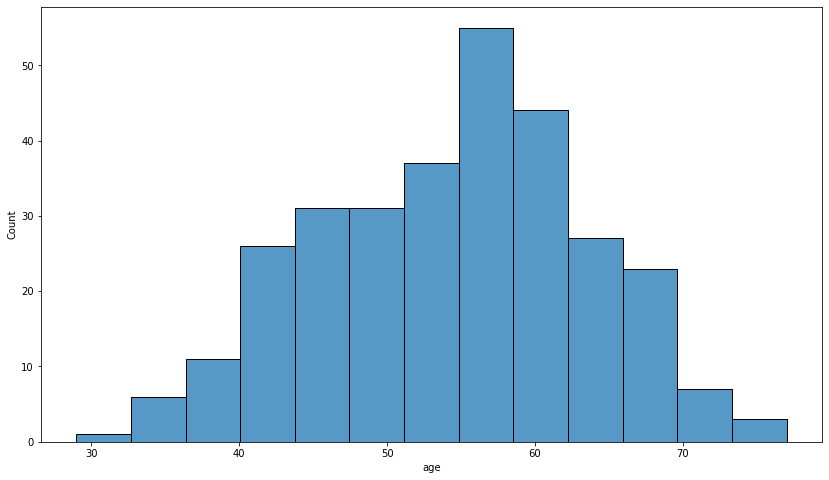

In [ ]:
#Histogram mit Seaborn
import seaborn as sns
plt.figure(figsize=(14,8))
sns.histplot(df['age'], kde=False)

Das Alter ist näherungsweise normalverteilt zwischen Min = 29 und Max = 77 Jahren.

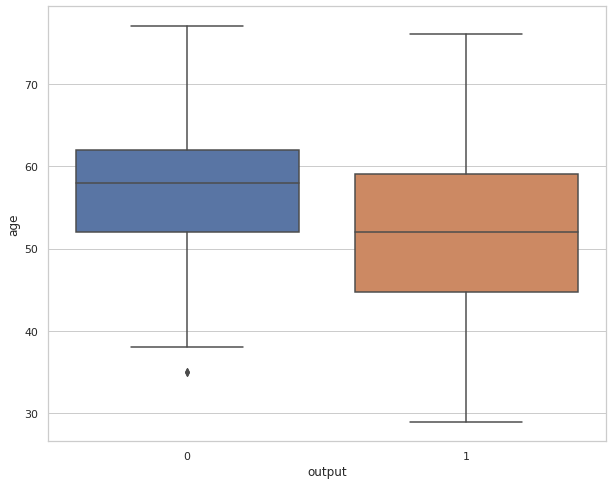

In [ ]:
#Beispielcode für Boxplots
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='output',y='age', data=df, orient="v")

Mit höhrerem Alter ist Herzerkrankung häufiger (output = 0).

No handles with labels found to put in legend.


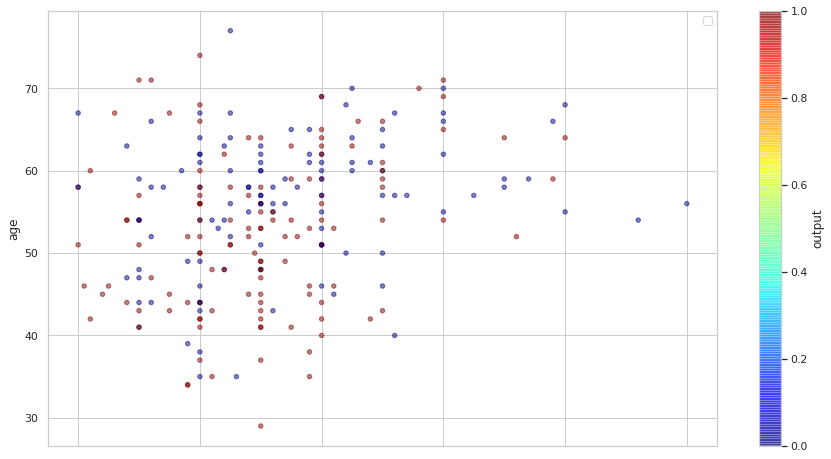

In [ ]:
# Zusammenhang zwischen Alter, Cholesterinspiegel, Blutdruck und der Outcomevariable
heart_train.plot(kind = "scatter", x = "trtbps", y = "age", alpha = 0.5, 
                      figsize=(15,8), 
                      c = "output",cmap = plt.get_cmap("jet"),colorbar=True) # c  = Punkte unterschiedlich gefärbt
plt.legend()

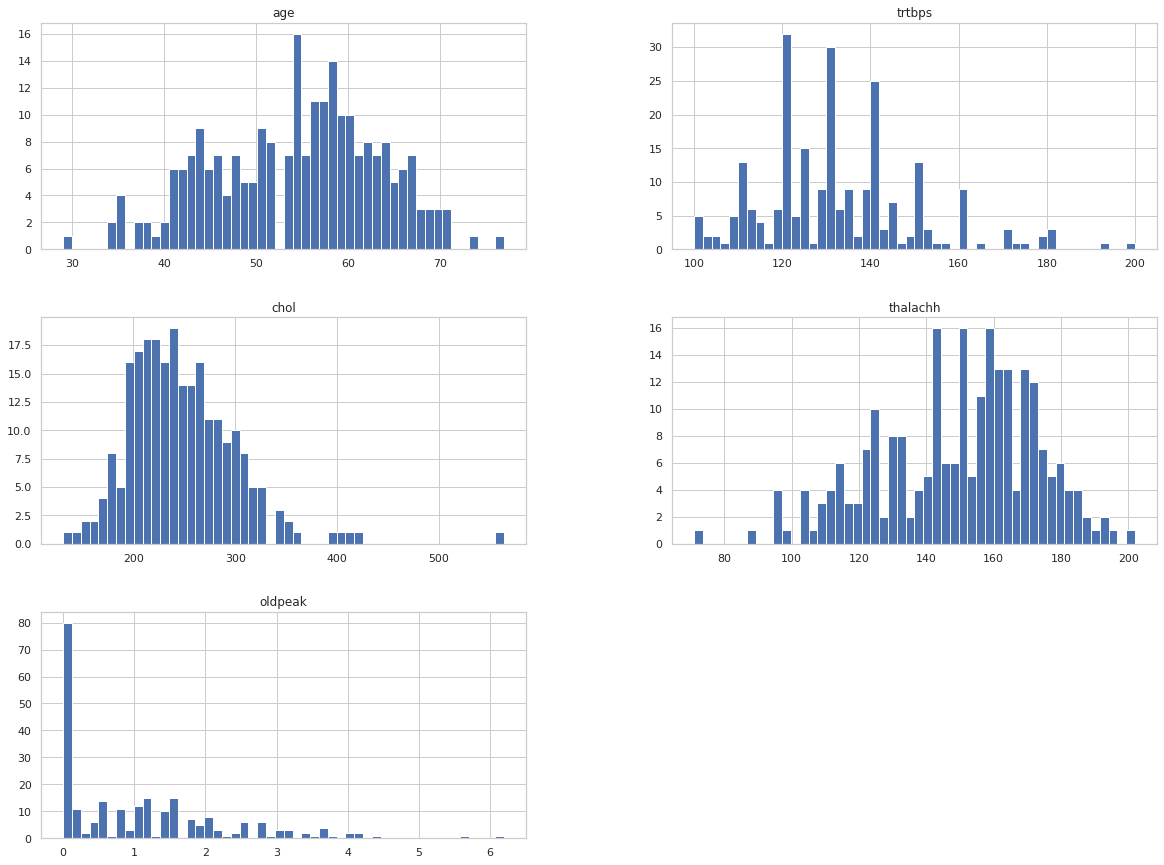

In [ ]:
continuous_colums = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
heart_train[continuous_colums].hist(bins = 50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad7ef0b0d0>,
      dtype=object)

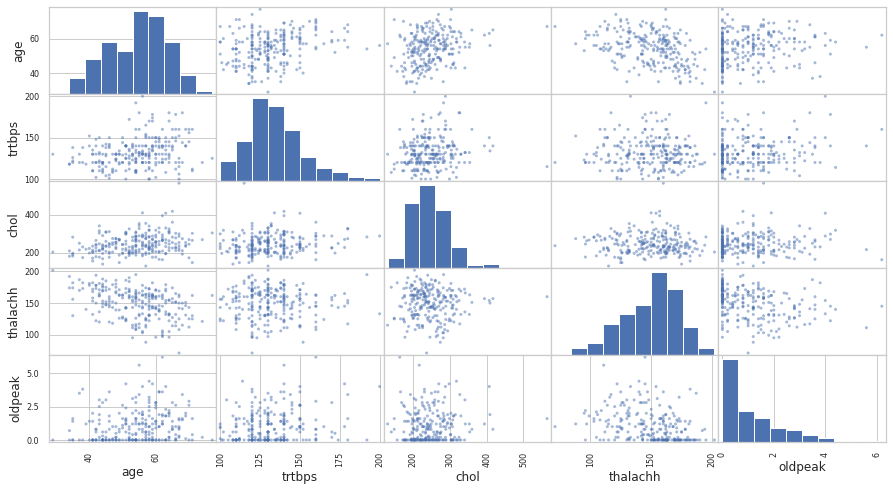

In [ ]:
#Korrelationen
from pandas.plotting import scatter_matrix
scatter_matrix(heart_train[continuous_colums], figsize = (15,8))

## Logistische Regression<a class="anchor" id="Kap3"></a>

### Daten transformieren/Feature scaling (Standardisieren)

In [ ]:
from sklearn.preprocessing import StandardScaler

continuous_colums = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
scaler = StandardScaler().fit(heart_train[continuous_colums])

def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data)
    return data

In [ ]:
heart_train_stand = scale_data(heart_train,continuous_colums,scaler)
heart_test_stand = scale_data(heart_test,continuous_colums,scaler)

In [ ]:
heart_train_stand.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,cp_0.0,cp_1.0,cp_2.0,cp_3.0,slp_0.0,slp_1.0,slp_2.0,restecg_0.0,restecg_1.0,restecg_2.0,thall_1.0,thall_2.0,thall_3.0
count,2.410000e+02,241.000000,2.410000e+02,2.410000e+02,241.000000,2.410000e+02,241.000000,2.410000e+02,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,-2.372468e-16,0.659751,-2.418536e-17,-2.418536e-17,0.145228,-2.418536e-17,0.340249,-2.418536e-17,0.684647,0.535270,0.502075,0.174274,0.248963,0.074689,0.082988,0.477178,0.439834,0.497925,0.489627,0.012448,0.053942,0.564315,0.381743
std,1.002081e+00,0.474779,1.002081e+00,1.002081e+00,0.353064,1.002081e+00,0.474779,1.002081e+00,0.939932,0.499792,0.501036,0.380134,0.433312,0.263436,0.276438,0.500518,0.497400,0.501036,0.500933,0.111105,0.226373,0.496878,0.486825
min,-2.815989e+00,0.000000,-2.815989e+00,-2.815989e+00,0.000000,-2.815989e+00,0.000000,-2.815989e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.069911e-01,0.000000,-7.069911e-01,-7.069911e-01,0.000000,-7.069911e-01,0.000000,-7.069911e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000824e-02,1.000000,7.000824e-02,7.000824e-02,0.000000,7.000824e-02,0.000000,7.000824e-02,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.360077e-01,1.000000,7.360077e-01,7.360077e-01,0.000000,7.360077e-01,1.000000,7.360077e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.512006e+00,1.000000,2.512006e+00,2.512006e+00,1.000000,2.512006e+00,1.000000,2.512006e+00,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
heart_test_stand.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,cp_0.0,cp_1.0,cp_2.0,cp_3.0,slp_0.0,slp_1.0,slp_2.0,restecg_0.0,restecg_1.0,restecg_2.0,thall_1.0,thall_2.0,thall_3.0
count,6.100000e+01,61.000000,6.100000e+01,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,-3.203266e-16,0.770492,6.370132e-17,6.370132e-17,0.163934,6.370132e-17,0.278689,6.370132e-17,0.590164,0.573770,0.360656,0.131148,0.426230,0.081967,0.016393,0.409836,0.573770,0.442623,0.540984,0.016393,0.081967,0.508197,0.409836
std,1.008299e+00,0.424006,1.008299e+00,1.008299e+00,0.373288,1.008299e+00,0.452075,1.008299e+00,0.919729,0.498632,0.484176,0.340363,0.498632,0.276591,0.128037,0.495885,0.498632,0.500819,0.502453,0.128037,0.276591,0.504082,0.495885
min,-1.712252e+00,0.000000,-1.712252e+00,-1.712252e+00,0.000000,-1.712252e+00,0.000000,-1.712252e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.354639e-01,1.000000,-8.354639e-01,-8.354639e-01,0.000000,-8.354639e-01,0.000000,-8.354639e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.605210e-01,1.000000,2.605210e-01,2.605210e-01,0.000000,2.605210e-01,0.000000,2.605210e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,8.085134e-01,1.000000,8.085134e-01,8.085134e-01,0.000000,8.085134e-01,1.000000,8.085134e-01,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.342892e+00,1.000000,2.342892e+00,2.342892e+00,1.000000,2.342892e+00,1.000000,2.342892e+00,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Kriterum und Prädiktoren definieren

In [ ]:
X_train = heart_train_stand.drop(columns = ["cp_0.0", "slp_0.0", "restecg_0.0", "thall_1.0", "output"])
y_train = heart_train_stand["output"]

X_test = heart_train_stand.drop(columns = ["cp_0.0", "slp_0.0", "restecg_0.0", "thall_1.0", "output"])
y_test = heart_train_stand["output"]

### Modell aufstellen

In [ ]:
from sklearn.linear_model import LogisticRegression
   
# create the model object
model = LogisticRegression()
model
    
# fit the model to the training data
model.fit(X_train, y_train, sample_weight=None)

Modell Prediction für späteren Vergleich der Modelle speichern

In [ ]:
y_fit_lr = model.predict(X_test)

### Modell testen

Accuracy bestimmen.

In [ ]:
model.score(X_test, y_test)

0.8879668049792531

ROC Kurve erstellen

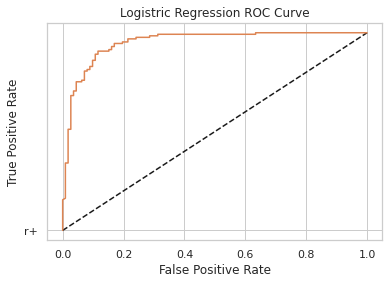

In [ ]:
from sklearn.metrics import roc_curve

# calculating the probabilities
y_pred_prob = model.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()



Einfluss der einzelnen Prädiktoren inspizieren

        age       sex    trtbps  ...  restecg_2.0  thall_2.0  thall_3.0
0  0.004358 -0.964712  0.004358  ...    -0.522629   0.645904  -1.384022

[1 rows x 18 columns]


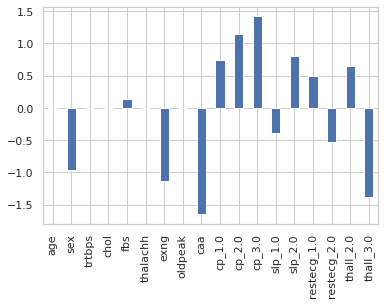

In [ ]:
coeffs = pd.DataFrame(data = model.coef_, columns = X_train.columns)
coeffs.T.plot.bar(legend=None);

## Support Vector Machines<a class="anchor" id="Kap3"></a>

#### Notwendige Schritte
  - verschiedene Kernel testen
  - Grid Search für Hyperparameter
  - Modelle schätzen
  - Fitted values speichern für spätere Berechnung von Gütemaßen  

In [ ]:
X_train_svm = heart_train_stand.drop("output", axis = 1)
y_train_svm = heart_train_stand.output

In [ ]:
X_test_svm = heart_test_stand.drop("output", axis = 1)
y_test_svm = heart_test_stand.output

In [ ]:
#Grid Search
from sklearn import svm
from sklearn.model_selection import GridSearchCV

model = svm.SVC()
param_grid = [
  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1,0.1, 0.001, 0.0001], 'kernel': ['rbf']},
 ]

grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_train_svm, y_train_svm)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid_search.best_params_)

{'C': 0.1, 'kernel': 'linear'}


In [ ]:
#Bestes Modell auf Testdaten anwenden und fitted values speichern
model = grid_search.best_estimator_
y_fit_svm = model.predict(X_test_svm)

#### Modell für C-Index optimieren

In [ ]:
from sklearn.metrics import make_scorer

def cindex(y_true, scores):
    '''

    Input:
    y_true (np.array): a 1-D array of true binary outcomes (values of zero or one)
        0: patient does not get the disease
        1: patient does get the disease
    scores (np.array): a 1-D array of corresponding risk scores output by the model

    Output:
    c_index (float): (concordant pairs + 0.5*ties) / number of permissible pairs
    '''
    n = len(y_true)
    assert len(scores) == n

    concordant = 0
    permissible = 0
    ties = 0
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # use two nested for loops to go through all unique pairs of patients
    for i in range(n):
        for j in range(i + 1, n): #choose the range of j so that j>i
            
            # Check if the pair is permissible (the patient outcomes are different)
            if y_true[i] != y_true[j]:
                # Count the pair if it's permissible
                permissible += 1

                # For permissible pairs, check if they are concordant or are ties

                # check for ties in the score
                if scores[i] == scores[j]:
                    # count the tie
                    ties += 1
                    # if it's a tie, we don't need to check patient outcomes, continue to the top of the for loop.
                    continue

                # case 1: patient i doesn't get the disease, patient j does
                if y_true[i] == 0 and y_true[j] == 1:
                    # Check if patient i has a lower risk score than patient j
                    if scores[i] < scores[j]:
                        # count the concordant pair
                        concordant += 1
                    # Otherwise if patient i has a higher risk score, it's not a concordant pair.
                    # Already checked for ties earlier

                # case 2: patient i gets the disease, patient j does not
                if y_true[i] == 1 and y_true[j] == 0:
                    # Check if patient i has a higher risk score than patient j
                    if scores[i] > scores[j]:
                        #count the concordant pair
                        concordant += 1
                    # Otherwise if patient i has a lower risk score, it's not a concordant pair.
                    # We already checked for ties earlier

    # calculate the c-index using the count of permissible pairs, concordant pairs, and tied pairs.
    c_index = (concordant + 0.5 * ties) / permissible
    ### END CODE HERE ###
    
    return c_index

scoring = {'main': 'accuracy',
          'c-index': make_scorer(cindex, greater_is_better=True)}

In [ ]:
c_model = svm.SVC(probability = True)
c_grid = GridSearchCV(c_model,param_grid, scoring = scoring, refit = 'c-index')
c_grid.fit(X_train_svm, y_train_svm)

KeyError: ignored

In [ ]:
print(c_grid.best_score_)
svm_c_index = c_grid.best_score_

AttributeError: ignored

## Decision Tree

### Modell aufstellen

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=10)   #max_depth=3, 
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

Modell Prediction für späteren Vergleich der Modelle speichern

In [ ]:
y_fit_dt = dt.predict(X_test)

In [ ]:
dt.score(X_test, y_test)

0.8630705394190872

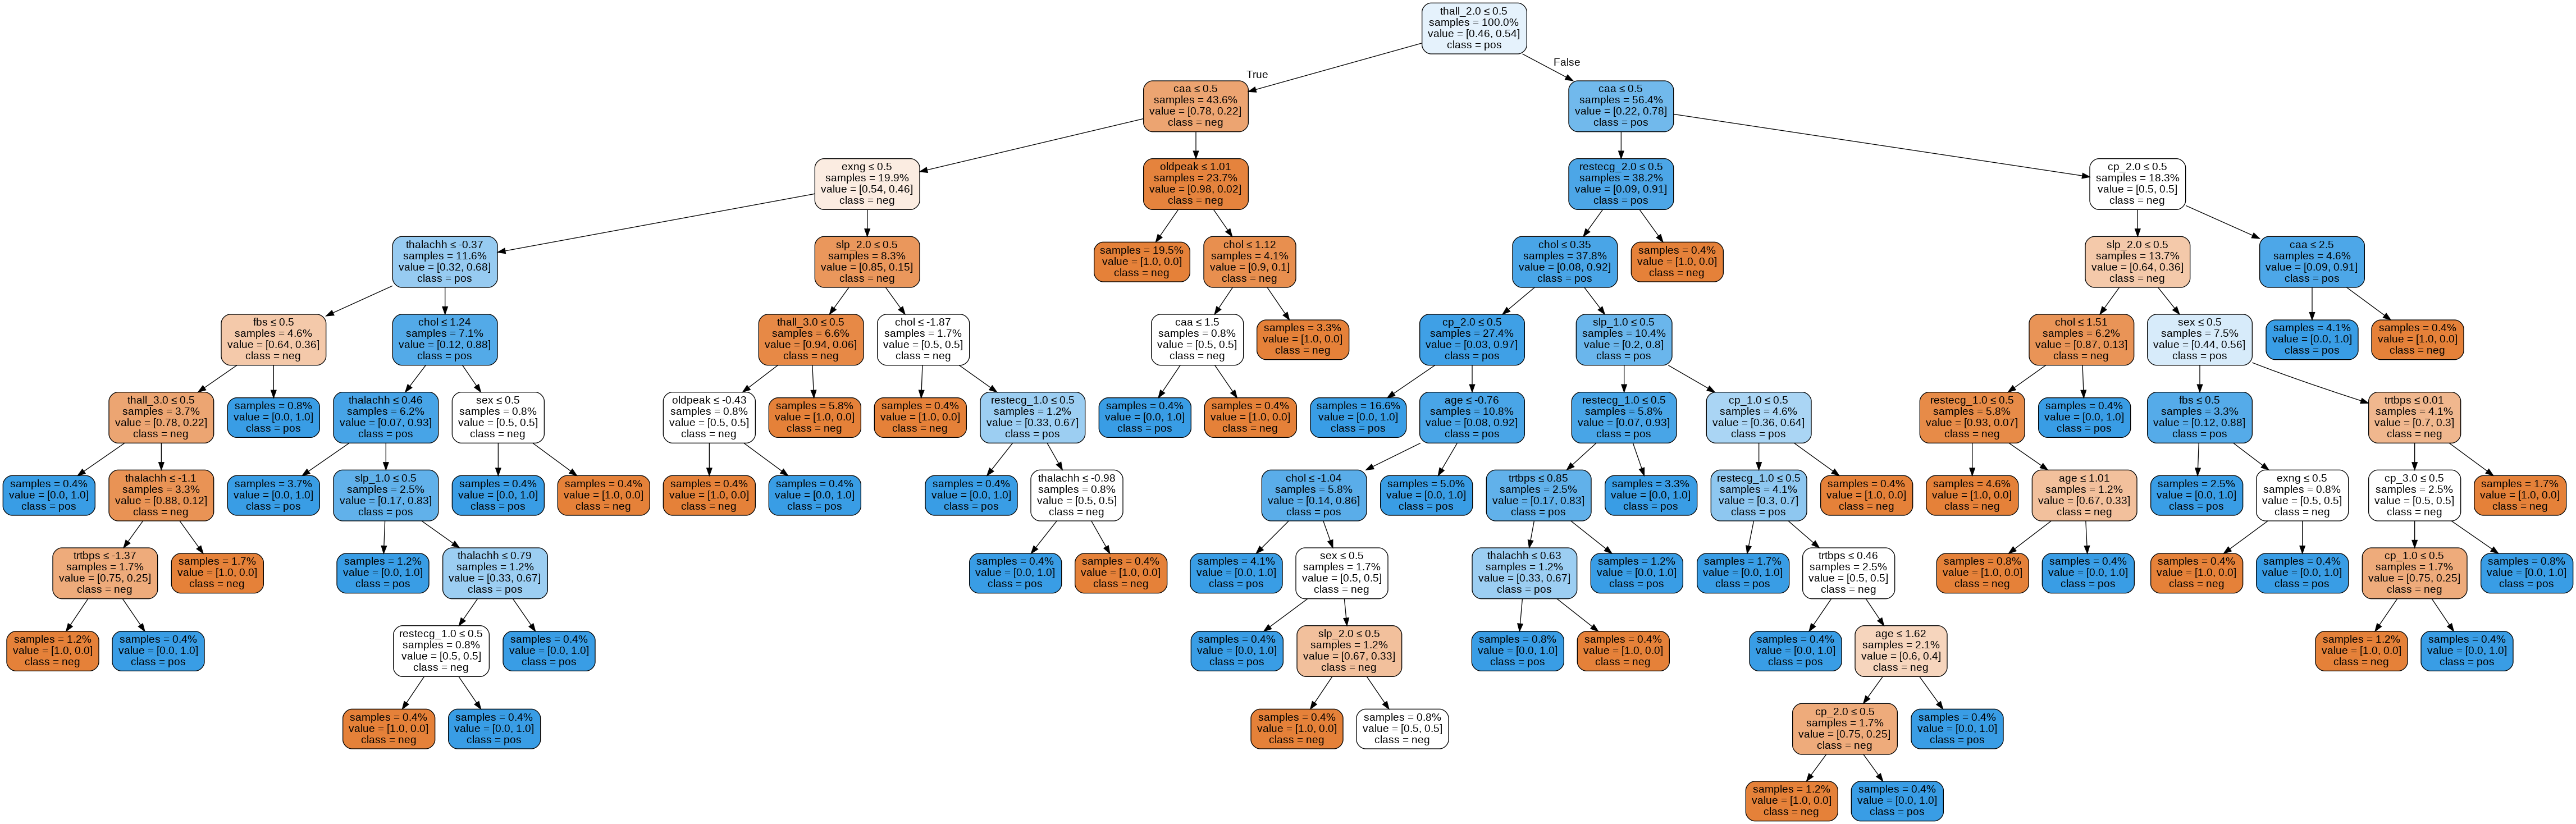

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image 

dot_data = StringIO()
export_graphviz(dt, feature_names=X_train.columns, out_file=dot_data,  
                filled=True, rounded=True, proportion=True, special_characters=True,
                impurity=False, class_names=['neg', 'pos'], precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = dt.predict(X_test)
cm = confusion_matrix(y_test,predictions)
print(cm)

[[112   0]
 [  1 128]]


## Modellgüte bestimmen<a class="anchor" id="Kap5"></a>

Funktion, die einige Gütemaße berechnet:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

def performance(y_test,y_fit):
    accuracy = accuracy_score(y_test, y_fit) * 100
    precision = precision_score(y_test, y_fit) * 100
    recall = recall_score(y_test, y_fit) * 100
    confusion = pd.crosstab(y_test, y_fit, rownames = ["Acutal"],colnames = ["Predicted"], margins = True)
    
    print("Modellgüte:")
    #print("C-Index: {:0.2f}.".format(svm_c_index))
    print("Accuracy: {:0.2f}%.".format(accuracy))
    print("Precision: {:0.2f}%.".format(precision))
    print("Recall: {:0.2f}%.".format(recall))
    print("Confusion Matrix")
    print(confusion)
    return

In [ ]:
performance(y_test_svm, y_fit_svm)

Modellgüte:
Accuracy: 73.77%.
Precision: 75.68%.
Recall: 80.00%.
Confusion Matrix
Predicted  0.0  1.0  All
Acutal                  
0.0         17    9   26
1.0          7   28   35
All         24   37   61


In [ ]:
performance(y_test,y_fit_lr)

Modellgüte:
Accuracy: 88.80%.
Precision: 86.96%.
Recall: 93.02%.
Confusion Matrix
Predicted  0.0  1.0  All
Acutal                  
0.0         94   18  112
1.0          9  120  129
All        103  138  241


In [ ]:
performance(y_test,y_fit_dt)

Modellgüte:
Accuracy: 86.31%.
Precision: 86.92%.
Recall: 87.60%.
Confusion Matrix
Predicted  0.0  1.0  All
Acutal                  
0.0         95   17  112
1.0         16  113  129
All        111  130  241


In [ ]:
lr_accuracy = accuracy_score(y_test, y_fit_lr) * 100
lr_precision = precision_score(y_test, y_fit_lr) * 100
lr_recall = recall_score(y_test, y_fit_lr) * 100

svm_accuracy = accuracy_score(y_test_svm, y_fit_svm) * 100
svm_precision = precision_score(y_test_svm, y_fit_svm) * 100
svm_recall = recall_score(y_test_svm, y_fit_svm) * 100

dt_accuracy = accuracy_score(y_test, y_fit_dt) * 100
dt_precision = precision_score(y_test, y_fit_dt) * 100
dt_recall = recall_score(y_test, y_fit_dt) * 100

Scores = ["Accuracy", "Precision", "Recall", "C-Index"]
lr_scores = [lr_accuracy, lr_precision, lr_recall]
svm_scores = [svm_accuracy, svm_precision, svm_recall]
dt_scores = [dt_accuracy, dt_precision, dt_recall]

In [ ]:
final = pd.DataFrame(list(zip(lr_scores,svm_scores, dt_scores)),
               columns =['LR', 'SVM', 'DT'], index = ["Accuracy", "Precision", "Recall"])

In [ ]:
print(final)

                  LR        SVM         DT
Accuracy   88.796680  73.770492  86.307054
Precision  86.956522  75.675676  86.923077
Recall     93.023256  80.000000  87.596899


## Ablage

### (Missing values entfernen)

In [ ]:
X_train_d = X_train.dropna(axis='rows')
y_train_d = y_train.loc[X_train_d.index]
X_test_d = X_test.dropna(axis='rows')
y_test_d = y_test.loc[X_test_d.index]


In [ ]:
def plotting_con_features(nrows,ncols,con_features):
    f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(28,40))
    f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
    for i in range(0,nrows):
        for j in range(0,ncols):
            ax[i][j].set_facecolor('#F2EDD7FF')

    #Plotting count plot 
    for i in range(0,nrows):
        for j in range(0,ncols):
            if(i==0): #For [0,0] sub plot
                if(j==0):
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Histplot of\ncontinuous features",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=40,fontstyle='italic')
                elif(j==1): #For [0,1] subplot
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Histplot with respect to\ntarget",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=40,fontstyle='italic')

            else:        
                #Without hueness
                if(j==0):
                    a1=sns.histplot(data=df,x=con_columns[i-1],palette='rocket',ax=ax[i][j],kde=True)
                #With hueness
                elif(j==1):
                    a2=sns.histplot(data=df,x=con_columns[i-1],hue='output',ax=ax[i][j],palette='rocket',multiple='stack',kde=True)

                #Dealing with spines
                ax[i][j].spines['top'].set_visible(False)
                ax[i][j].spines['right'].set_visible(False)
                ax[i][j].spines['left'].set_visible(False)
                ax[i][j].grid(linestyle="--",axis='y',color='gray')

IndexError: ignored

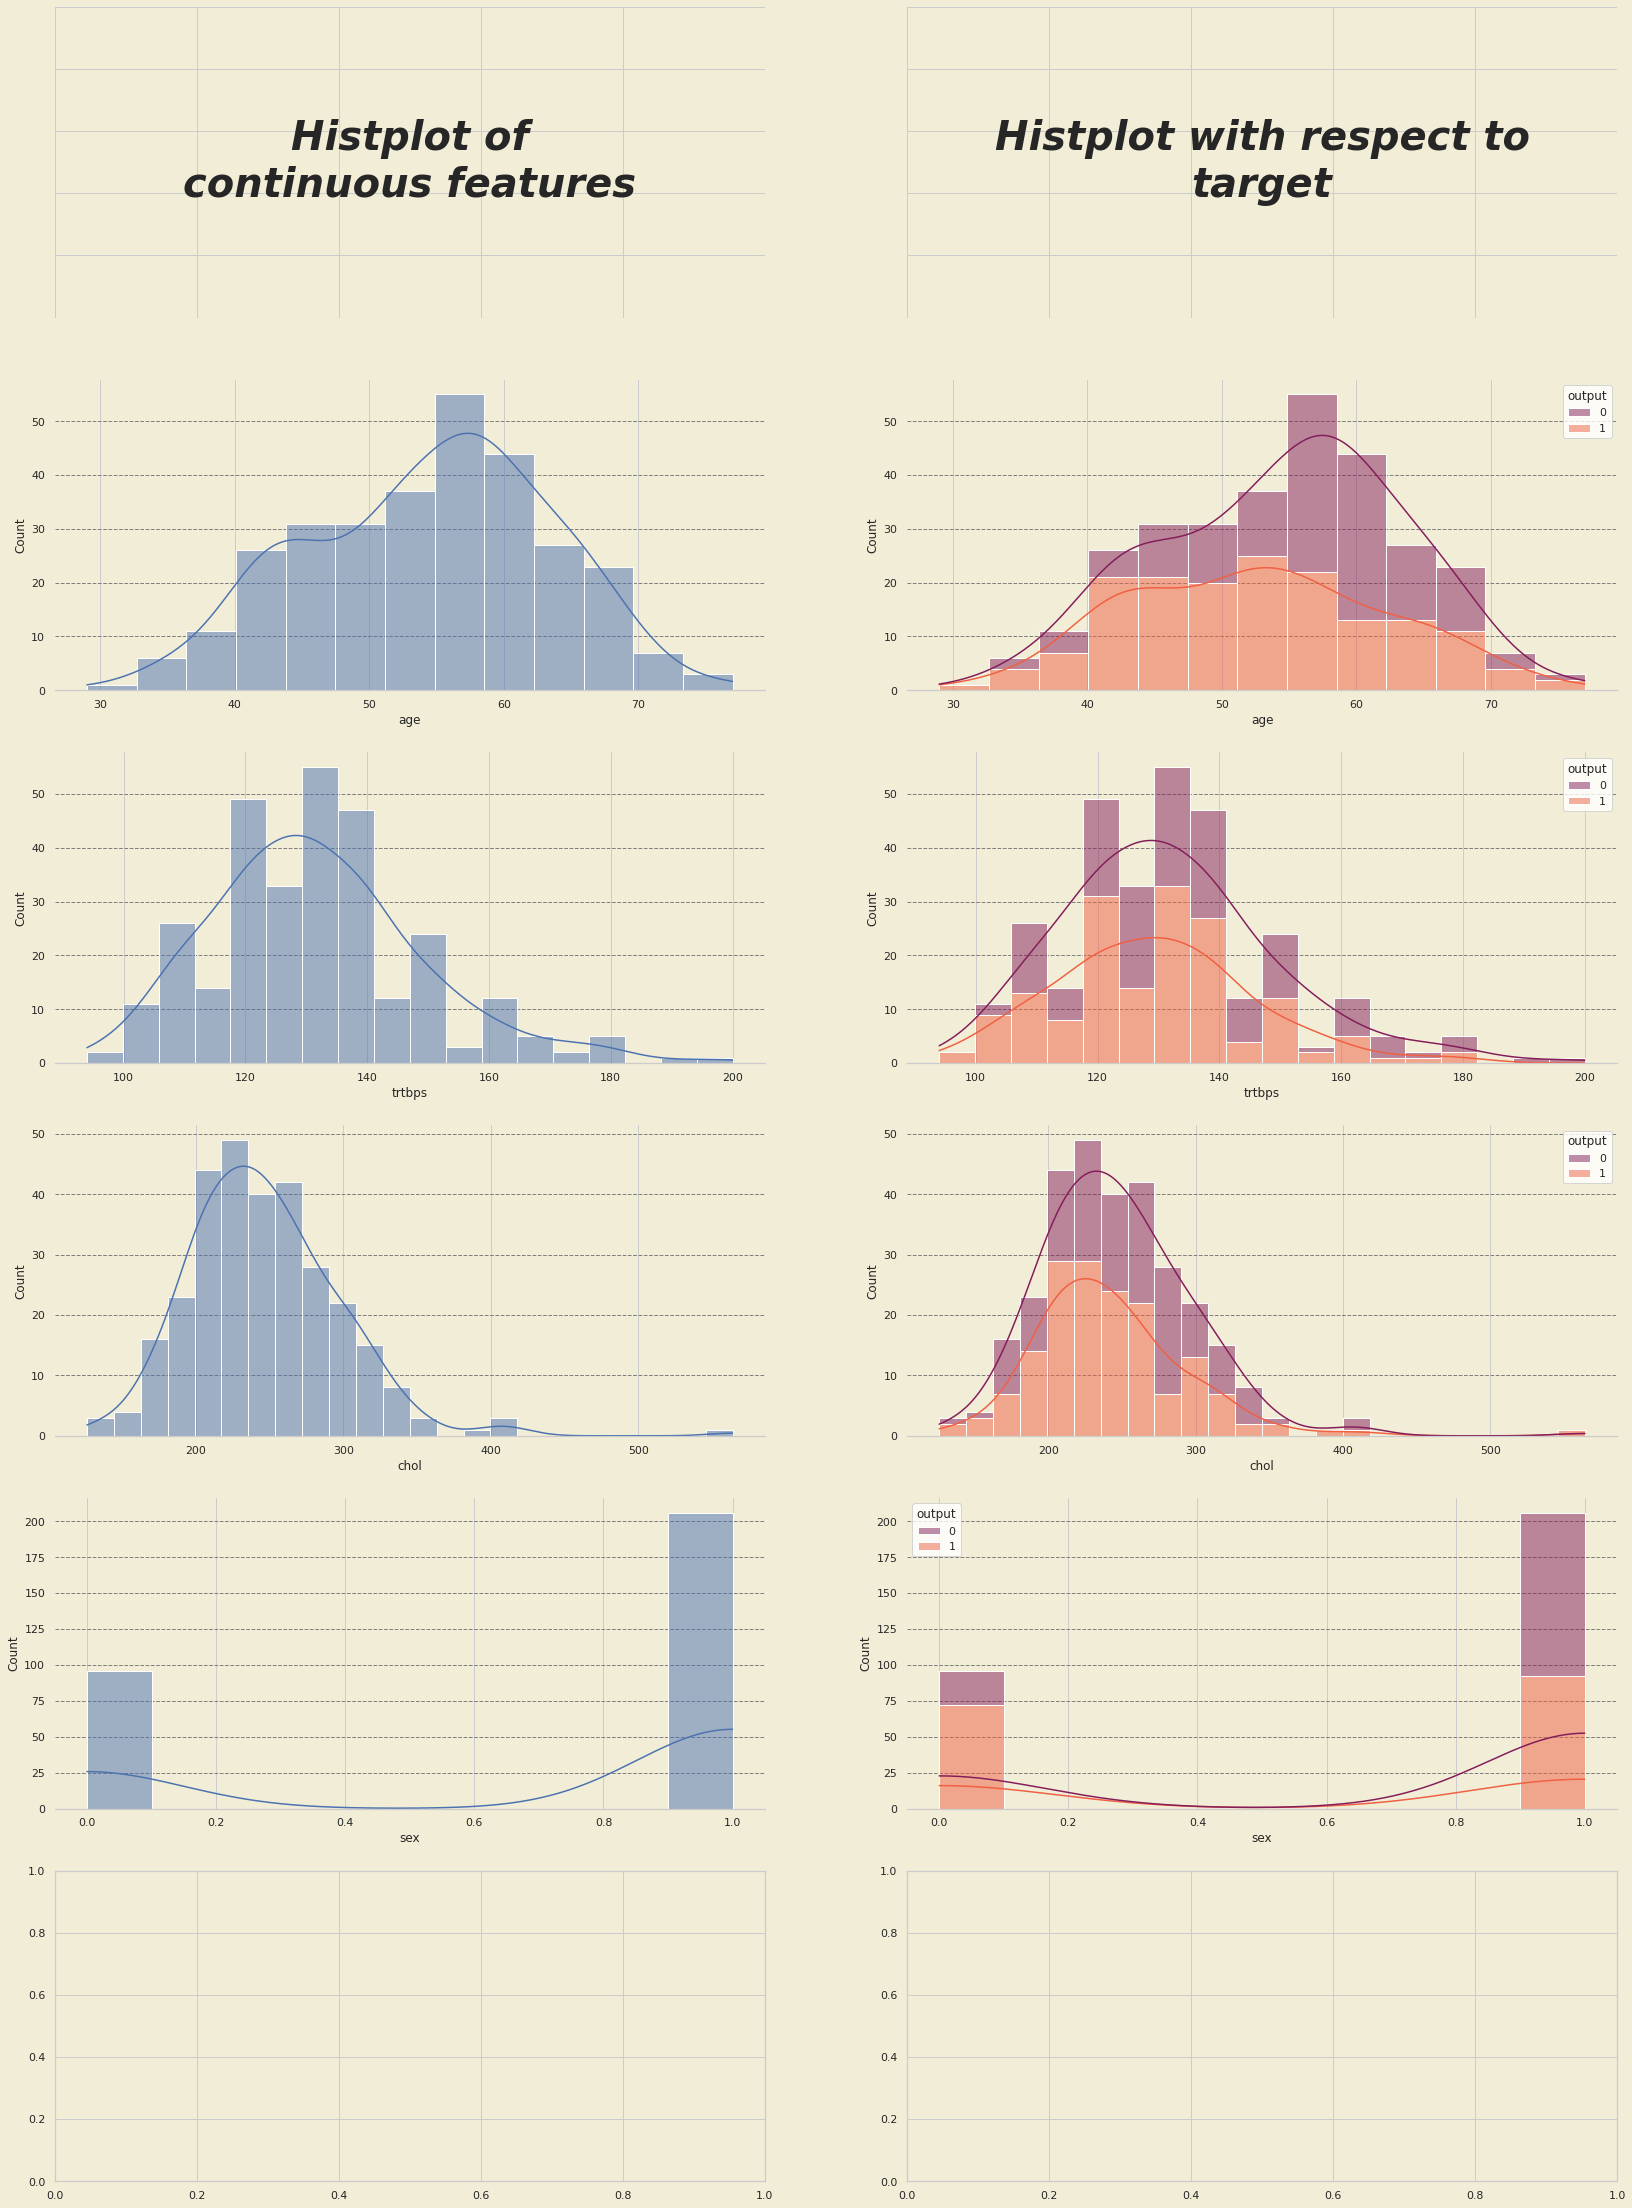

In [ ]:
con_columns=['age' , 'trtbps' , 'chol' , 'sex']
plotting_con_features(6,2,con_columns)

In [ ]:
y = np.ravel(y) #Abh. Variable muss als Array vorliegen

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #Reihenfolge beachten!

### Skalieren / Transformieren

In [ ]:
from sklearn.preprocessing import StandardScaler #MinMaxScaler für MinMaxScaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled

### Modell schätzen

In [ ]:
#Grid Search
from sklearn import svm
from sklearn.model_selection import GridSearchCV

model = svm.SVC()
param_grid = [
  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1,0.1, 0.001, 0.0001], 'kernel': ['rbf']},
 ]

grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
#Bestes Modell auf Testdaten anwenden und fitted values speichern
model = grid_search.best_estimator_
y_fit = model.predict(X_test)

### Modellgüte bestimmen

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

def performance(y_test,y_fit):
    accuracy = accuracy_score(y_test, y_fit) * 100
    precision = precision_score(y_test, y_fit) * 100
    recall = recall_score(y_test, y_fit) * 100
    confusion = pd.crosstab(y_test, y_fit, rownames = ["Acutal"],colnames = ["Predicted"], margins = True)
    
    print("Modellgüte:")
    print("Accuracy: {:0.2f}%.".format(accuracy))
    print("Precision: {:0.2f}%.".format(precision))
    print("Recall: {:0.2f}%.".format(recall))
    print("Confusion Matrix")
    print(confusion)
    return

In [ ]:
performance(y_test, y_fit)